<a href="https://colab.research.google.com/github/Nova3012k/Regression-Methods-Machine-Learning-/blob/main/Polynomial_Regression_The_Only_Introduction_You%E2%80%99ll_Need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression: The Only Introduction You’ll Need**

## **Fundamentos de la tecnica**

La regresión polinomial es una técnica de aprendizaje automático supervisado que se utiliza para modelar relaciones no lineales entre una variable independiente (por ejemplo, el tiempo o los días) y una variable dependiente (por ejemplo, el número de casos de una enfermedad).

En lugar de ajustar una línea recta —como en la regresión lineal simple—, la regresión polinomial ajusta una curva que puede representar mejor el comportamiento de los datos cuando estos no siguen una tendencia lineal.

Matemáticamente, consiste en ampliar el modelo lineal tradicional incluyendo potencias de la variable independiente, de modo que:
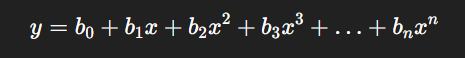

Donde:

y - es la variable que queremos predecir

x - es la variable de entrada

b1,b2,…,bn -son los coeficientes del modelo

y n - es el grado del polinomio

## **¿Para qué sirve?**

La regresión polinomial se utiliza en muchos contextos donde los datos crecen o decrecen de forma curva y no se ajustan bien a una línea recta

Algunos ejemplos incluyen:

+ Predicción de crecimiento poblacional

+ Modelado de tendencias económicas o de ventas

+ Análisis del progreso de una epidemia (como el COVID-19)

+ Estimación de fenómenos naturales o biológicos

Esta imagen muestra diferentes tipos de funciones polinomiales según su grado:
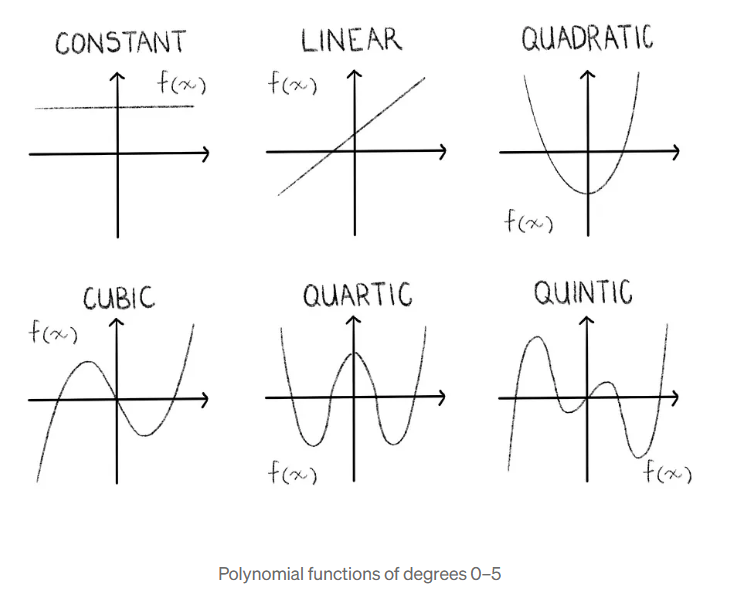

- **Constant (0 grado):** la función es una línea horizontal. No depende de \(X\).  
- **Linear (1 grado):** la función es una línea recta, típica de la regresión lineal.  
- **Quadratic (2 grado):** la función tiene forma de parábola (U), captura relaciones curvilíneas simples.  
- **Cubic (3 grado):** puede tener hasta dos cambios de dirección, ajusta curvas más complejas.  
- **Quartic (4 grado):** permite hasta tres cambios de dirección, útil para patrones con varias inflexiones.  
- **Quintic (5 grado):** permite hasta cuatro cambios de dirección, captura comportamientos muy oscilantes en los datos.

**Fundamentos adicionales:***

- La regresión polinomial transforma la variable \(X\) en nuevas características elevadas a potencias (\(X^2, X^3, ...\))
- Se aplica regresión lineal sobre estas características transformadas para ajustar la curva
- Permite capturar patrones curvos en los datos que un modelo lineal no podría representar
- El grado del polinomio controla la flexibilidad del modelo: un grado muy alto puede causar sobreajuste, mientras que uno muy bajo puede no capturar la complejidad de los datos


## **Caso de estudio: Casos de COVID-19**

En este ejemplo práctico, aplicaremos la regresión polinomial para modelar la evolución del número de casos de COVID-19 en China durante un período de 30 días

El objetivo es observar:

+ Cómo se ajusta el modelo cuadrático (grado 2) frente al cúbico (grado 3)

+ Qué tan bien explica cada modelo los datos (mediante el valor de R²)

- Y finalmente, realizar una predicción de los casos futuros

# **Descripción de la librería, clases, funciones y su parámetros**

## **Regresión Polinómica en Python: Ejemplo con Casos de COVID-19**

## **Importar las librerias**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## **Creacion del DataSet**



In [12]:
# Datos simulados: días (x) y casos reportados (y)
x = np.arange(1, 31)
y = np.array([59, 77, 93, 149, 131, 120, 160, 185, 220, 270,
              290, 320, 350, 370, 400, 410, 430, 440, 445, 460,
              470, 475, 478, 480, 482, 483, 484, 484, 484, 484])

# Crear dataframe para visualizar
data = pd.DataFrame({'Día': x, 'Casos': y})
data.head()



,Día,Casos
0,1,59
1,2,77
2,3,93
3,4,149
4,5,131


## **División de Datos en Entrenamiento y Prueba**

Usamos train_test_split de Scikit-Learn para dividir los datos:

80 % entrenamiento

20 % prueba

random_state=42 para reproducibilidad

In [13]:
x = data['Día'].values
y = data['Casos'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)



## **Inspección Visual de los Datos**

Antes de aplicar la regresión, observamos cómo se distribuyen los datos
Esto nos ayuda a intuir si una línea recta bastará o si necesitamos una curva (como una cuadrática o cúbica)

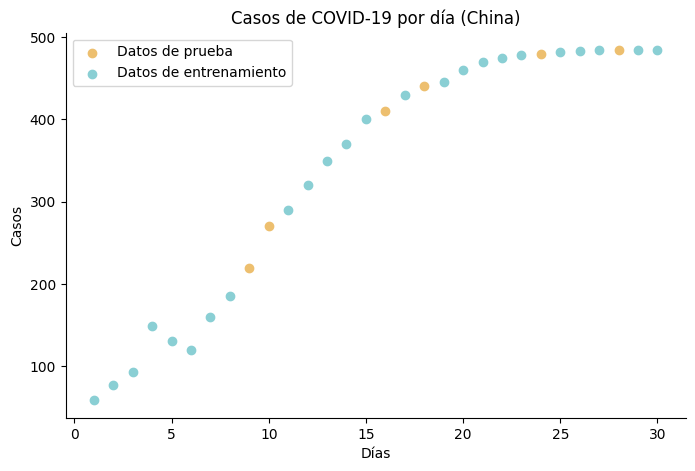

In [14]:
# Configurar estilo visual
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Gráfica de dispersión
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.legend(loc="upper left")
plt.title("Casos de COVID-19 por día (China)")
plt.xlabel("Días")
plt.ylabel("Casos")
plt.show()


Los datos no siguen una línea recta; parecen ajustarse mejor a una curva

## **Preparación de los Datos**

PolynomialFeatures necesita que los arreglos tengan forma de matriz 2D.
Además, ordenamos los datos para que las gráficas sean coherentes

In [15]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Ordenar según el valor de x
y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]


## **Regresión Polinomial de Grado 2 (Cuadrática)**

Aplicamos una regresión polinomial de segundo grado, ideal para capturar curvas suaves

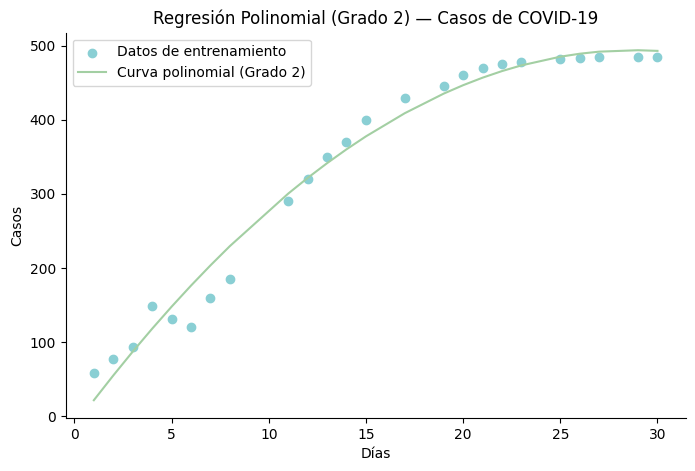

R² (Grado 2): 0.9791552276170792


In [16]:
# Definir modelo polinomial grado 2
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x_train)

# Entrenar el modelo
model2 = LinearRegression()
model2.fit(x_poly2, y_train)

# Graficar resultados
plt.figure(figsize=(8,5))
plt.title('Regresión Polinomial (Grado 2) — Casos de COVID-19')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.plot(x_train, model2.predict(x_poly2), c='#a3cfa3', label='Curva polinomial (Grado 2)')
plt.legend(loc="upper left")
plt.show()

# Calcular precisión R²
print("R² (Grado 2):", model2.score(x_poly2, y_train))


Aquí vemos una curva cuadrática que comienza a seguir el crecimiento de los casos

## **Regresión Polinomial de Grado 3 (Cúbica)**

Probemos ahora con un modelo de tercer grado, para captar mejor los cambios de tendencia en la evolución de los casos

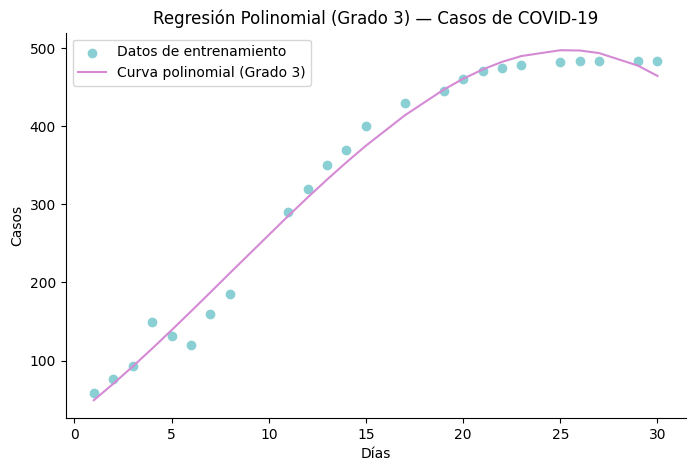

R² (Grado 3): 0.9873722777824646


In [17]:
# Definir modelo cúbico
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x_train)

# Entrenar modelo cúbico
model3 = LinearRegression()
model3.fit(x_poly3, y_train)

# Graficar resultados
plt.figure(figsize=(8,5))
plt.title('Regresión Polinomial (Grado 3) — Casos de COVID-19')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.plot(x_train, model3.predict(x_poly3), c='#d48ad4', label='Curva polinomial (Grado 3)')
plt.legend(loc="upper left")
plt.show()

# Calcular precisión R²
print("R² (Grado 3):", model3.score(x_poly3, y_train))


Este modelo suele ajustarse mejor a datos reales que crecen rápido y luego se estabilizan (como epidemias).

## **Predicción de Casos Futuros**

Podemos usar el modelo cúbico para predecir los próximos días y ver la tendencia esperada

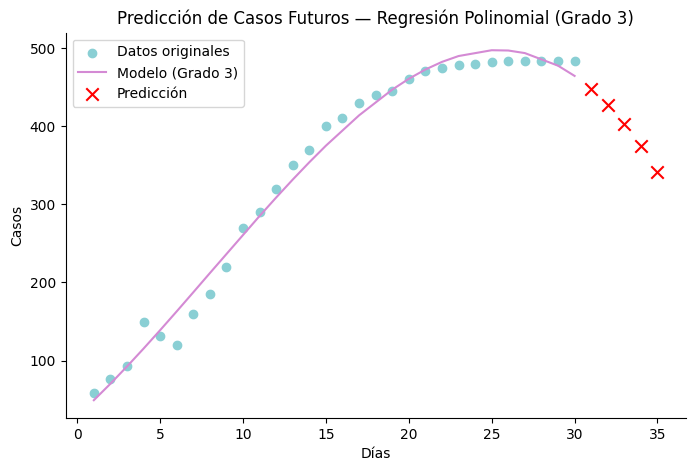

Día 31: 447.6 casos estimados
Día 32: 427.2 casos estimados
Día 33: 402.8 casos estimados
Día 34: 374.3 casos estimados
Día 35: 341.5 casos estimados


In [21]:
# Días futuros (31 al 35)
dias_futuros = np.arange(31, 36).reshape(-1, 1)
x_futuro_poly = poly3.transform(dias_futuros)
predicciones = model3.predict(x_futuro_poly)

# Graficar predicción junto con los datos originales
plt.figure(figsize=(8,5))
plt.title('Predicción de Casos Futuros — Regresión Polinomial (Grado 3)')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.scatter(x, y, c='#8acfd4', label='Datos originales')
plt.plot(x_train, model3.predict(x_poly3), c='#d48ad4', label='Modelo (Grado 3)')
plt.scatter(dias_futuros, predicciones, c='red', marker='x', s=80, label='Predicción')
plt.legend(loc="upper left")
plt.show()

# Mostrar resultados de predicción
for dia, caso in zip(dias_futuros.flatten(), predicciones.flatten()):
    print(f"Día {dia}: {caso:.1f} casos estimados")


## **Comparación y Conclusión**

Comparamos los valores de R² para decidir qué modelo representa mejor los datos

In [19]:
r2_deg2 = model2.score(x_poly2, y_train)
r2_deg3 = model3.score(x_poly3, y_train)

print(f"R² Grado 2: {r2_deg2:.3f}")
print(f"R² Grado 3: {r2_deg3:.3f}")

if r2_deg3 > r2_deg2:
    print("El modelo cúbico (grado 3) describe mejor la evolución de los casos.")
else:
    print("El modelo cuadrático (grado 2) es suficiente para representar los datos.")


R² Grado 2: 0.979
R² Grado 3: 0.987
El modelo cúbico (grado 3) describe mejor la evolución de los casos.
